## Working with the DataBase: VENPAYBI

### The Table BiTXEVAProcessorsInstantKpis

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [ ]:
query = """
       SELECT *
  FROM [VENPAY-BI].[dbo].[BiTXEVAProcessors] P INNER JOIN [VENPAY-BI].[dbo].[BiTXEVAProcessorsInstantKpis] BP 
          ON P.PK_BiTXEVAProcessorId = BP.FK_BiTXEVAProcessorId
 """

df_bitx5= pd.read_sql(query, engine)
df_bitx5

,PK_BiTXEVAProcessorId,Hostname,LastKpi,PK_BiTXEVAProcessorInstantKpisId,FK_BiTXEVAProcessorId,ReferenceDate,EventsCompletedCounter,EventsErrorsCounter,ReportsCompletedCounter,ReportsErrorsCounter,AvgEventTimeMs,AvgReportTimeMs
0,1,apps04,2023-07-18 10:55:00,1,1,2022-12-19 08:05:00,602,0,176,0,38.0,163.0
1,2,apps02,2023-02-03 05:55:00,2,2,2022-12-19 08:05:00,907,0,253,0,35.0,160.0
2,1,apps04,2023-07-18 10:55:00,3,1,2022-12-19 08:10:00,721,0,340,0,42.0,173.0
3,2,apps02,2023-02-03 05:55:00,4,2,2022-12-19 08:10:00,961,0,448,0,41.0,170.0
4,1,apps04,2023-07-18 10:55:00,5,1,2022-12-19 08:15:00,699,0,375,0,36.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242835,280,pd0mdwk0000se,2023-07-18 10:55:00,252833,280,2023-07-18 10:50:00,808,0,141,0,35.0,238.0
242836,283,pd1mdwk00002p,2023-07-18 10:55:00,252834,283,2023-07-18 10:50:00,795,0,141,0,35.0,229.0
242837,1,apps04,2023-07-18 10:55:00,252835,1,2023-07-18 10:55:00,0,0,0,0,NaN,NaN
242838,280,pd0mdwk0000se,2023-07-18 10:55:00,252836,280,2023-07-18 10:55:00,807,0,139,0,34.0,237.0


In [ ]:
df_bitx5.describe()

,PK_BiTXEVAProcessorId,PK_BiTXEVAProcessorInstantKpisId,FK_BiTXEVAProcessorId,EventsCompletedCounter,EventsErrorsCounter,ReportsCompletedCounter,ReportsErrorsCounter,AvgEventTimeMs,AvgReportTimeMs
count,242840.000000,242840.000000,242840.000000,242840.000000,242840.000000,242840.000000,242840.000000,199806.000000,1.995430e+05
mean,102.967831,131216.629748,102.967831,415.511534,0.051590,136.903097,0.005168,65.791062,2.304839e+02
std,99.817543,70455.736251,99.817543,493.304766,1.664767,198.349589,0.362625,2112.035535,4.866101e+03
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+01
25%,2.000000,70706.750000,2.000000,187.000000,0.000000,50.000000,0.000000,21.000000,1.210000e+02
50%,78.000000,131417.500000,78.000000,393.000000,0.000000,106.000000,0.000000,31.000000,1.610000e+02
75%,181.000000,192127.250000,181.000000,576.250000,0.000000,158.000000,0.000000,49.000000,2.300000e+02
max,284.000000,252837.000000,284.000000,158713.000000,202.000000,41825.000000,80.000000,357840.000000,1.890361e+06


In [ ]:
query = """
       SELECT TOP 10
      [FK_BiTXEVAProcessorId]
      ,SUM([AvgEventTimeMs]) AS TotalAvgEventTime
      ,SUM([AvgReportTimeMs]) AS TotalAvgReportTime
  FROM [VENPAY-BI].[dbo].[BiTXEVAProcessors] P INNER JOIN [VENPAY-BI].[dbo].[BiTXEVAProcessorsInstantKpis] BP 
          ON P.PK_BiTXEVAProcessorId = BP.FK_BiTXEVAProcessorId
  GROUP BY [FK_BiTXEVAProcessorId], Hostname
 
 """

df_bitx6 = pd.read_sql(query, engine)
df_bitx6

,FK_BiTXEVAProcessorId,TotalAvgEventTime,TotalAvgReportTime
0,18,12525,55517
1,33,1092,6462
2,43,495,2077
3,68,250,1456
4,86,5859,33751
5,93,40288,168008
6,118,33385,157396
7,136,4704,25507
8,138,4806,20368
9,143,836,3622


In [ ]:
df_bitx6.describe()

,FK_BiTXEVAProcessorId,TotalAvgEventTime,TotalAvgReportTime
count,10.000000,10.000000,10.000000
mean,87.600000,10424.000000,47416.400000
std,46.075301,14490.268965,63126.925886
min,18.000000,250.000000,1456.000000
25%,49.250000,900.000000,4332.000000
50%,89.500000,4755.000000,22937.500000
75%,131.500000,10858.500000,50075.500000
max,143.000000,40288.000000,168008.000000


<Axes: xlabel='FK_BiTXEVAProcessorId'>

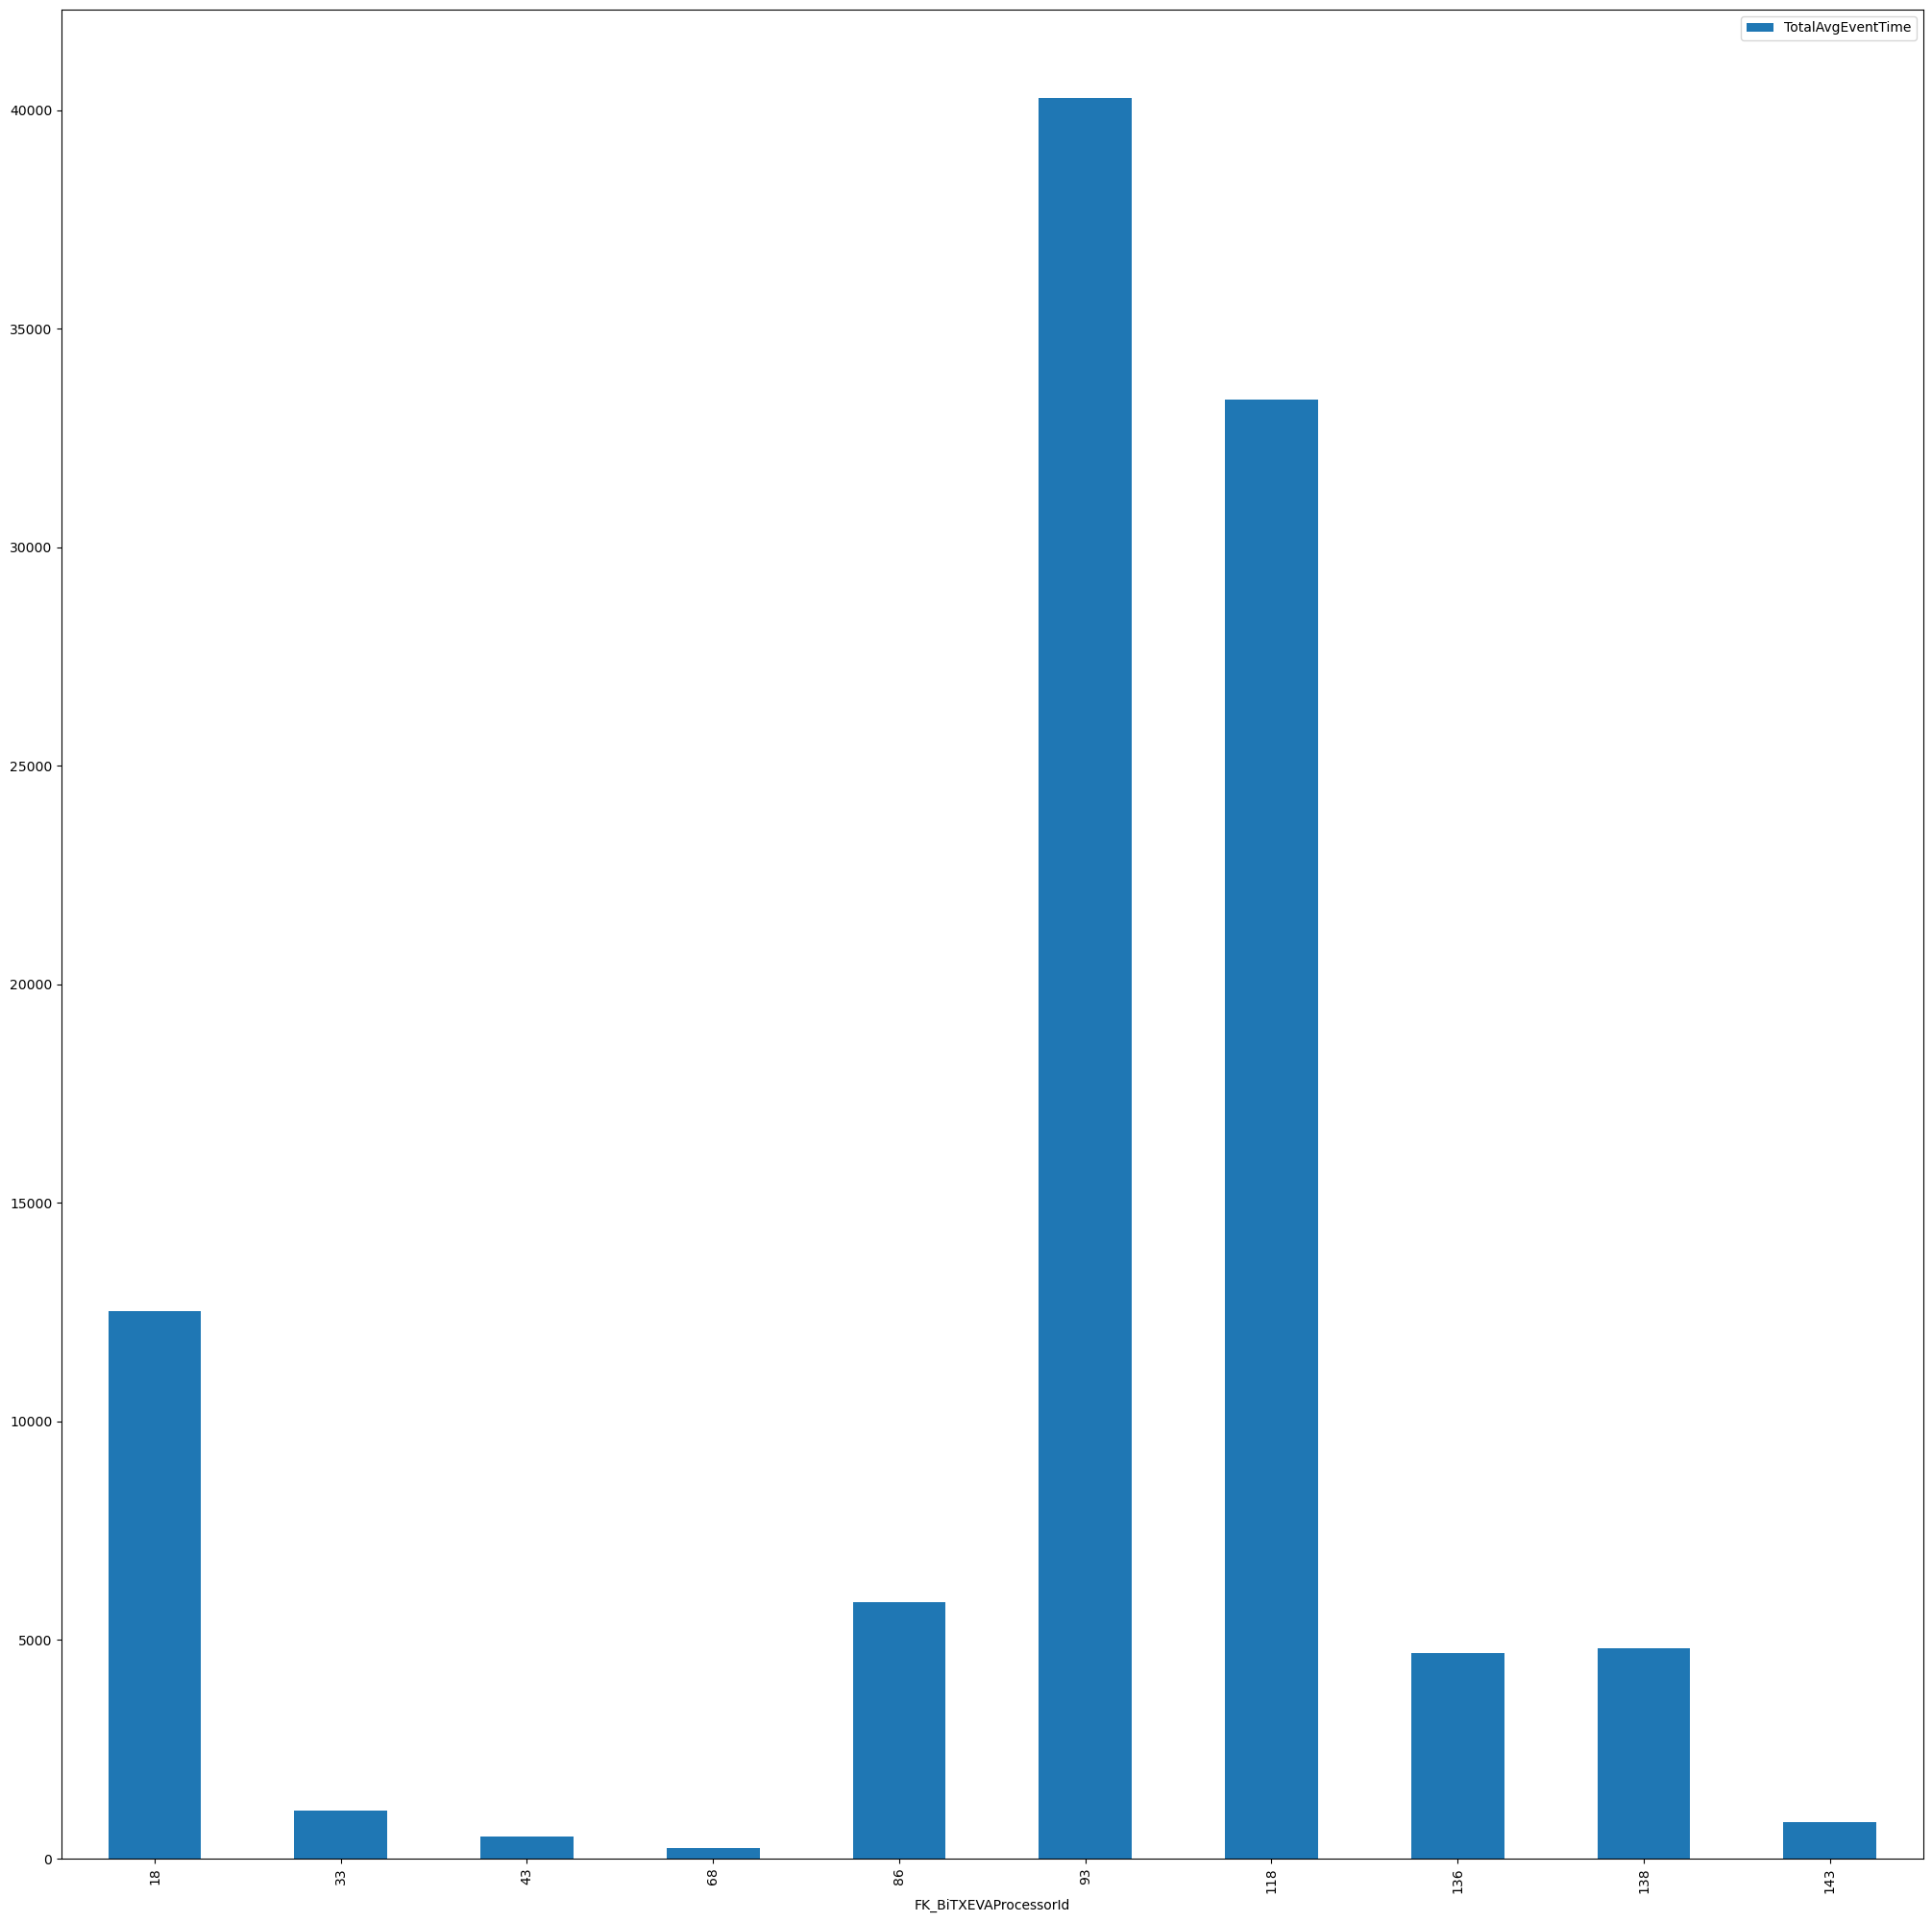

In [ ]:
df_bitx6.plot(
  kind="bar",
  x="FK_BiTXEVAProcessorId",     
  y="TotalAvgEventTime",
  figsize=(25, 25)
  )

<Axes: xlabel='FK_BiTXEVAProcessorId'>

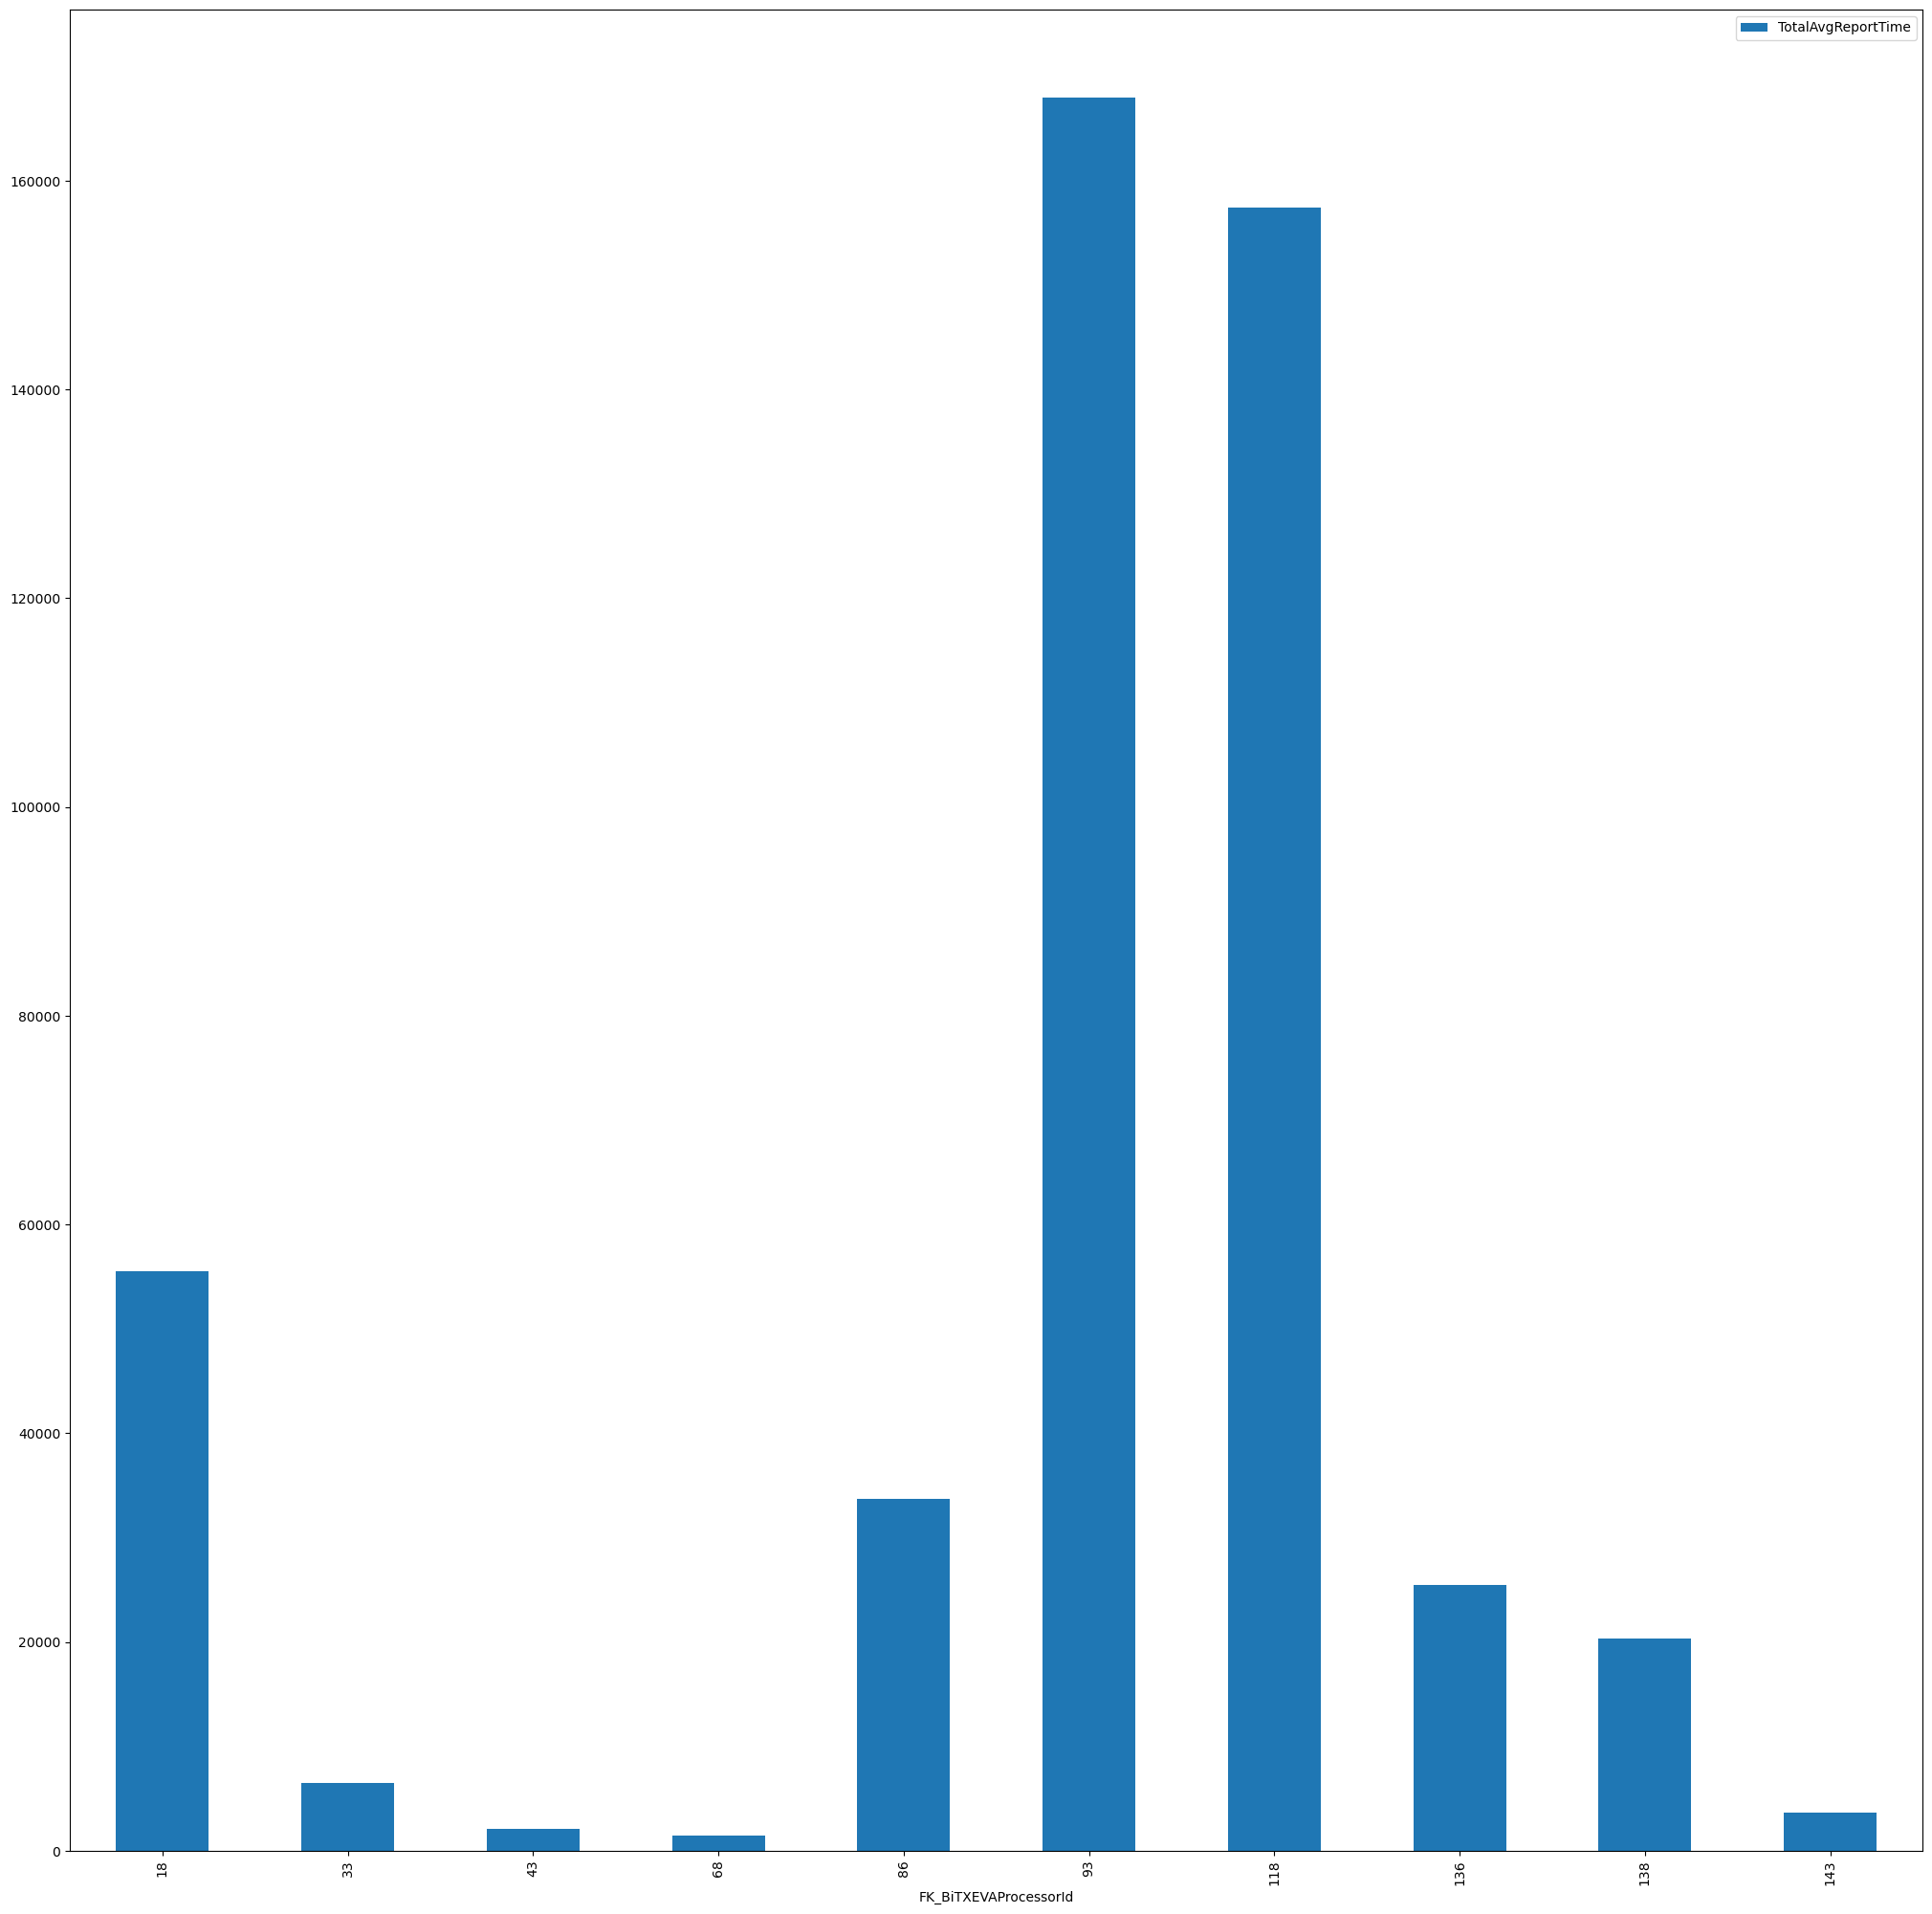

In [ ]:
df_bitx6.plot(
  kind="bar",
  x="FK_BiTXEVAProcessorId",     
  y="TotalAvgReportTime",
  figsize=(25, 25)
  )